In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lib import parse_response

In [3]:
H = [1,3,5,7]
dfs = []
for h in H:
    if h == 1:
        f = open(f"/home/gabriel/projects/llmpc/trip_planner/output/solution.json",'r')
    else:
        f = open(f"/home/gabriel/projects/llmpc/trip_planner/output/llmpc_solution_{h}.json",'r')
    data = json.load(f)
    rows = [v for k,v in data.items()]
    solutions = [parse_response(d['pred_5shot_pro']) for d in rows]
    cities = ["**".join([t[0] for t in s]) for s in solutions]
    durations = ["**".join([str(t[1]) for t in s]) for s in solutions]
    df = pd.DataFrame(rows)
    df['cities_pred'] = cities
    df['durations_pred'] = durations
    df['H'] = h
    dfs.append(df)

In [4]:
for df in dfs:
    df['score'] = ((df['cities']==df['cities_pred']) & (df['durations'] == df['durations_pred']))

In [5]:
for df in dfs:
    print(df['score'].mean())

0.14583333333333334
0.3625
0.4125
0.44583333333333336


In [6]:
grouped_dfs = []
for df in dfs:
    d = df[['num_cities','score']].groupby('num_cities').mean().reset_index()
    grouped_dfs.append(d)

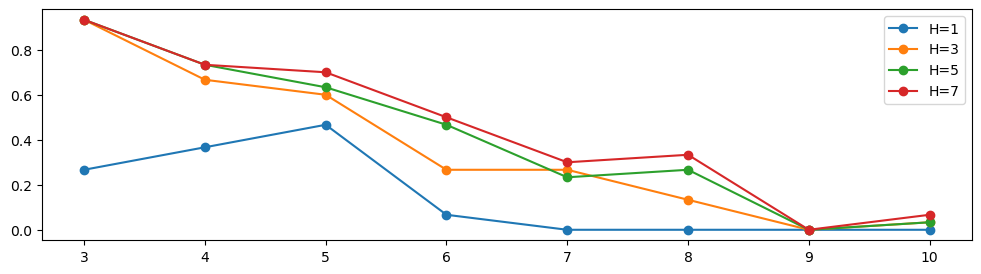

In [ ]:
plt.figure(figsize=(12,3))
for i,df in enumerate(grouped_dfs):
    plt.plot(df['num_cities'], df['score'], marker='o', label=f"T={H[i]}")
plt.legend()
plt.show()

In [12]:
grouped_dfs[0]['model'] = 'GPT-4o'
grouped_dfs[1]['model'] = 'LLMPC T=3'
grouped_dfs[2]['model'] = 'LLMPC T=5'
grouped_dfs[3]['model'] = 'LLMPC T=7'

In [13]:
dg = pd.concat(grouped_dfs)
pivoted = dg.pivot(index='num_cities', columns='model', values='score')


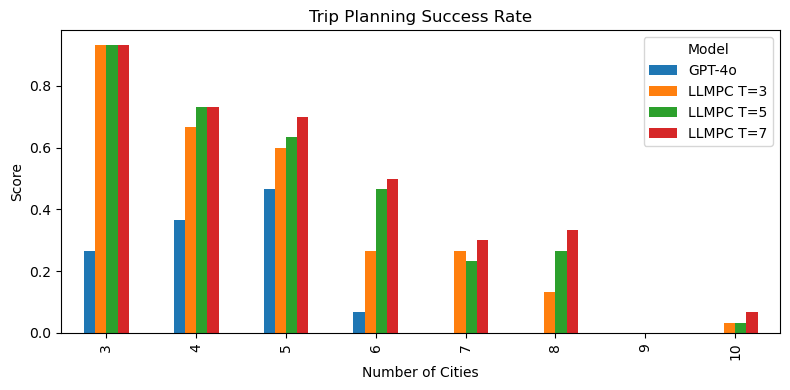

In [18]:
pivoted.plot(kind='bar', figsize=(8, 4))

plt.title('Trip Planning Success Rate')
plt.xlabel('Number of Cities')
plt.ylabel('Score')
plt.legend(title='Model')
plt.tight_layout()
plt.savefig("./output/trip_planning_bar.pdf", dpi=300)
plt.show()